#  Naive Bayes 
1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual
using ---SalaryData_Train.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('SalaryData_Train.csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
### -- EDA---
df.shape

(30161, 14)

In [4]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
df.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
##-- Seperating numerical and categorical columns
hp = ['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation',
      'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native', 'Salary']
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [9]:
# Separating numerical and categorical columns from hp
numerical_hp = [col for col in hp if col in numerical_columns]
categorical_hp = [col for col in hp if col in categorical_columns]
print(numerical_hp)
print(categorical_hp)

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


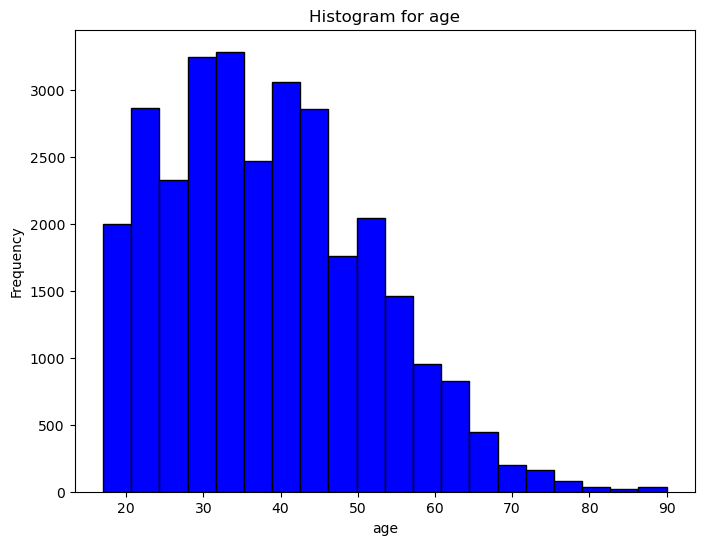

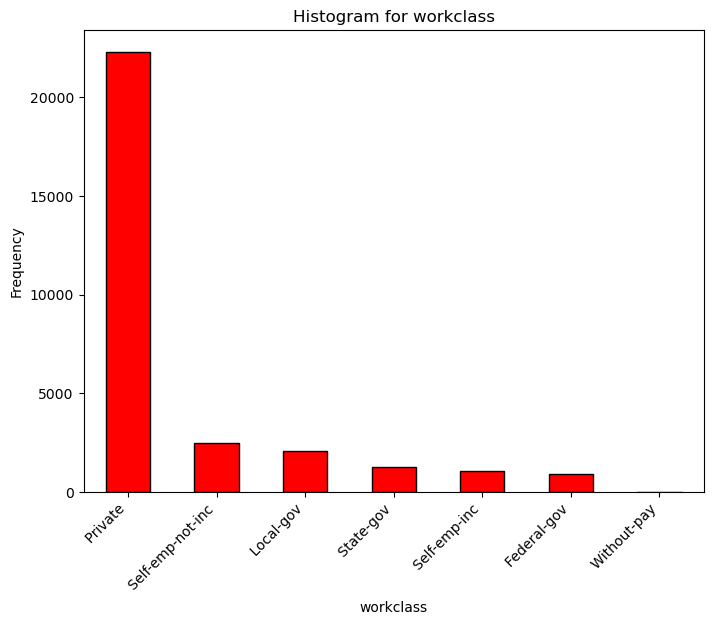

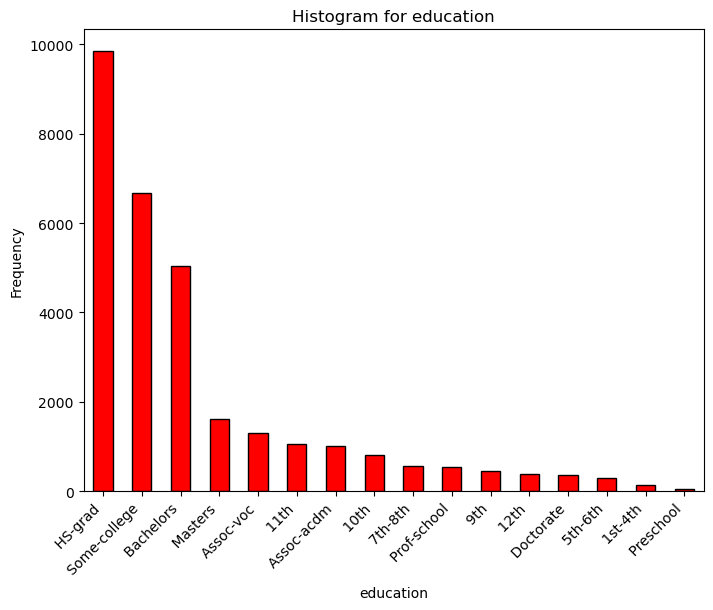

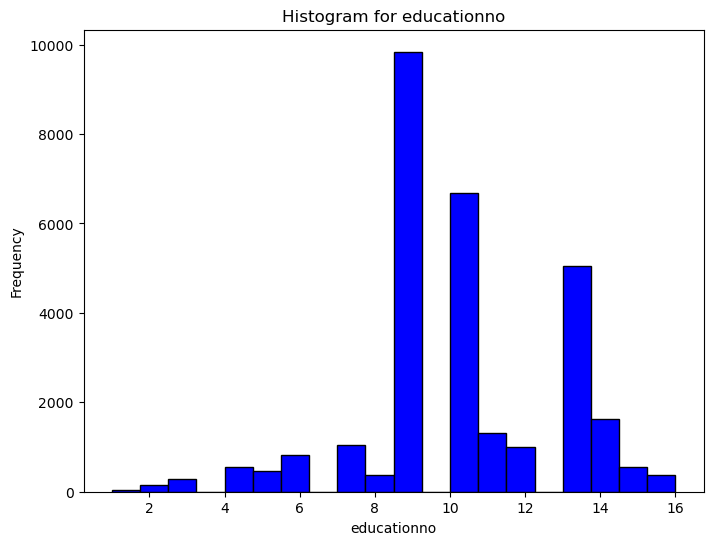

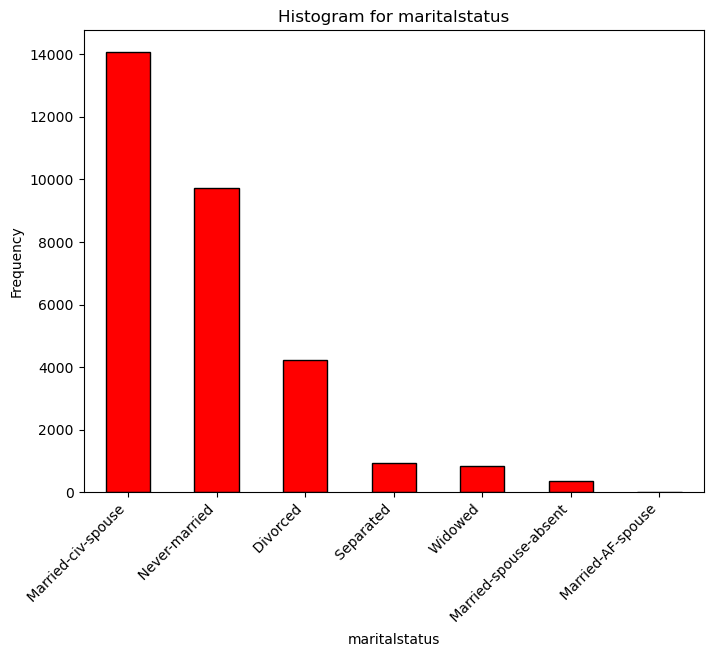

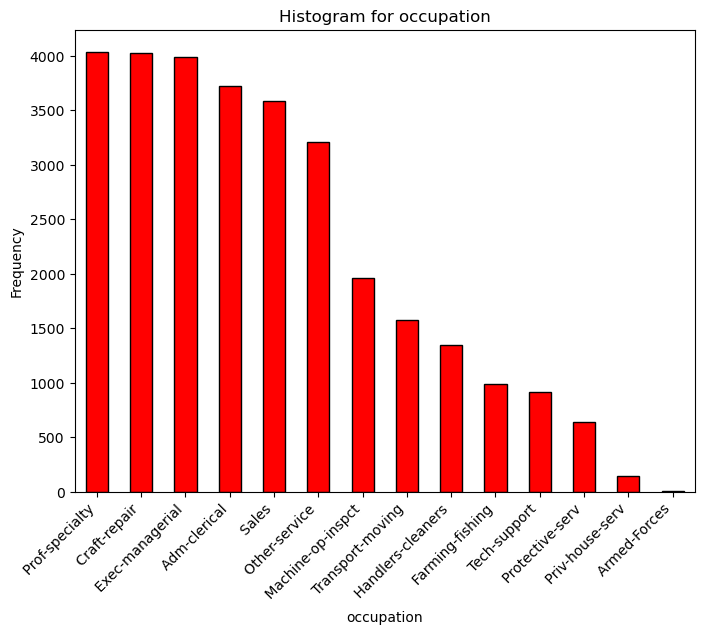

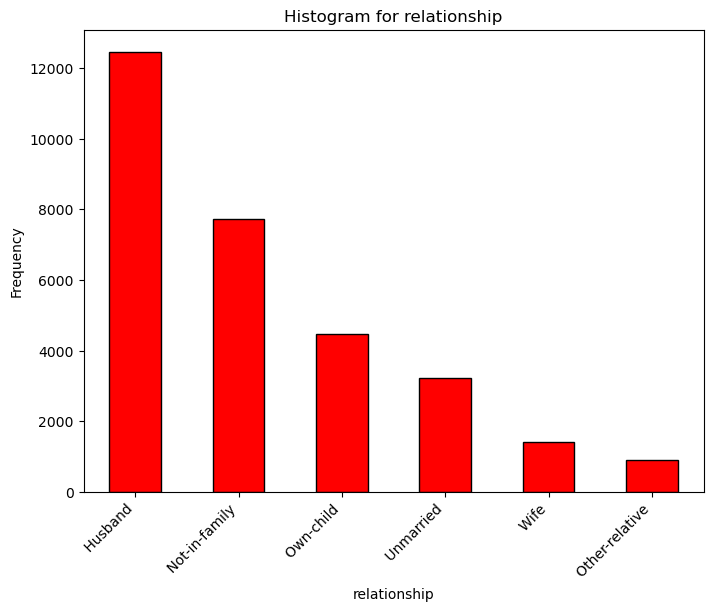

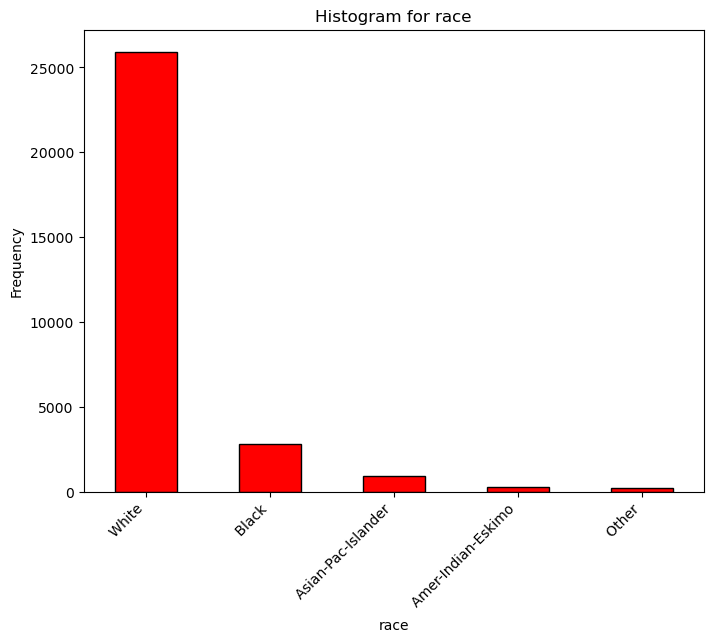

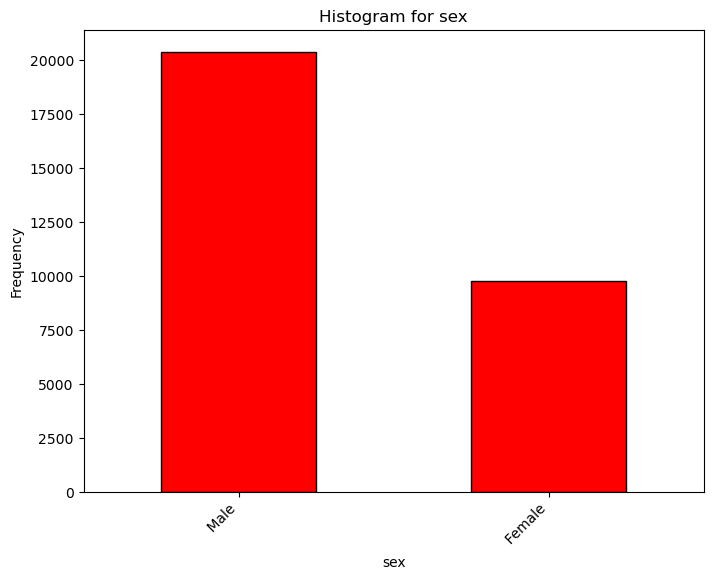

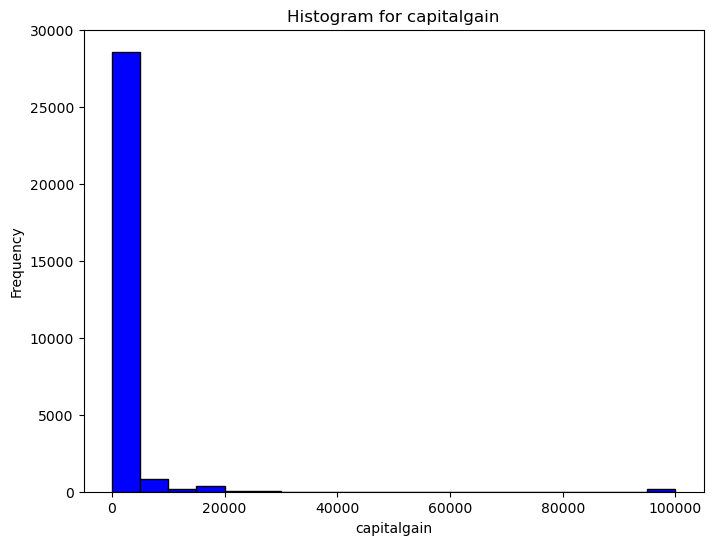

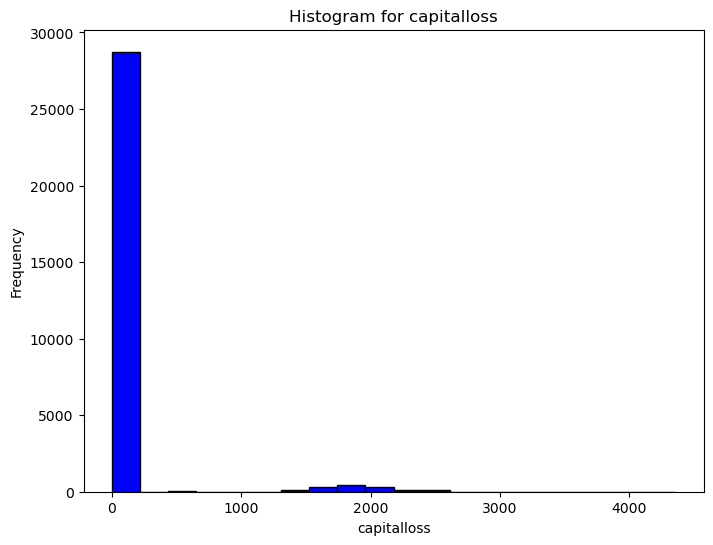

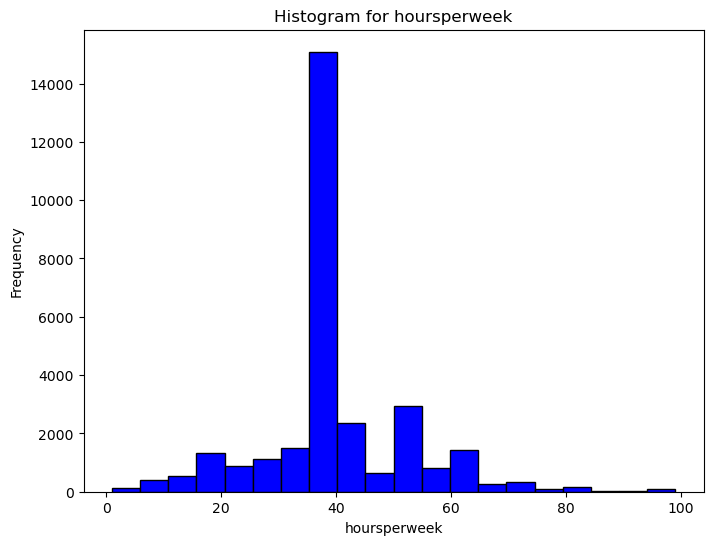

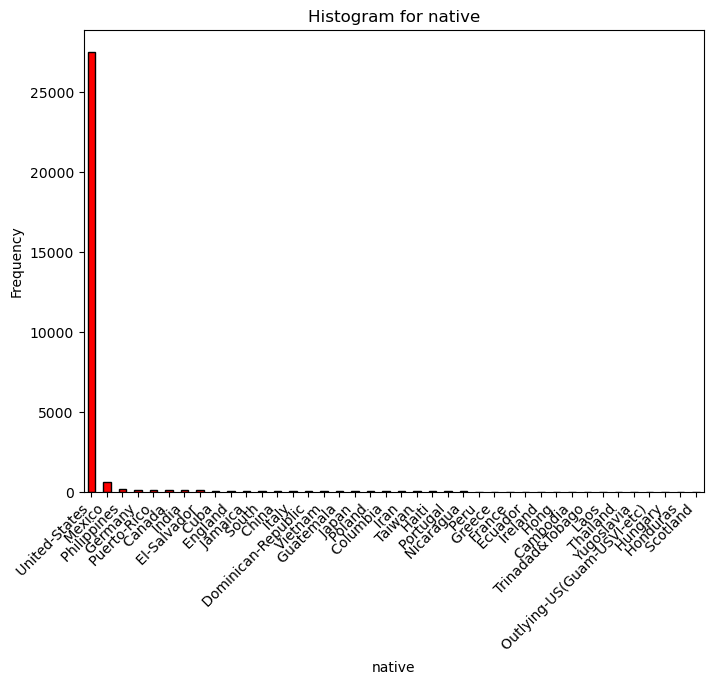

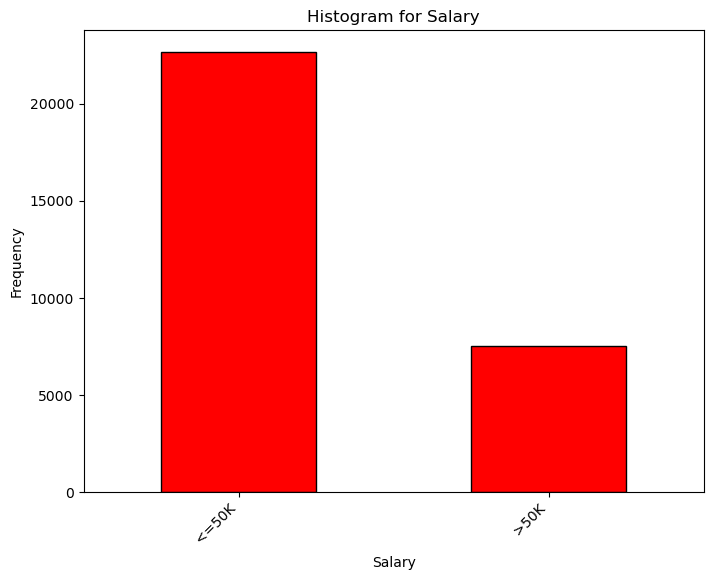

In [10]:
###-- Histogram---###    
hp = ['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation',
      'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native', 'Salary']
for variable in hp:
    plt.figure(figsize=(8, 6))
    if df[variable].dtype == 'O':  # If the variable is categorical
        df[variable].value_counts().plot(kind='bar', color='red', edgecolor='black')
        plt.title(f'Histogram for {variable}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:  # If the variable is numerical
        plt.hist(df[variable], bins=20, color='blue', edgecolor='black')
        plt.title(f'Histogram for {variable}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
    plt.show()    

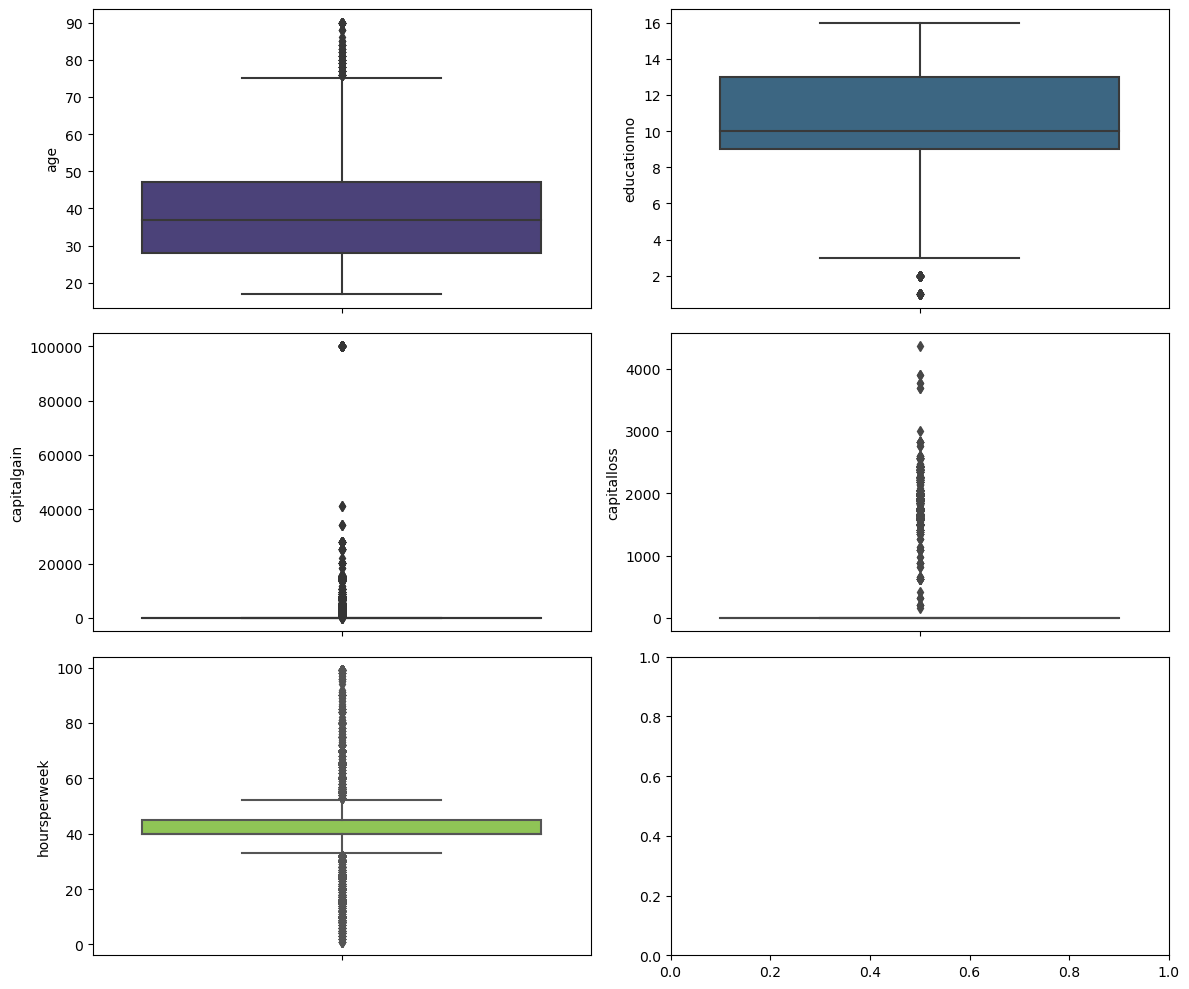

In [11]:
## -- box plot ----
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
b1 = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
colors = sns.color_palette('viridis', n_colors=len(b1))
for i, (variable, color) in enumerate(zip(b1, colors)):
    sns.boxplot(data=df, y=variable, ax=axes[i // 2, i % 2], color=color)
plt.tight_layout()
plt.show()

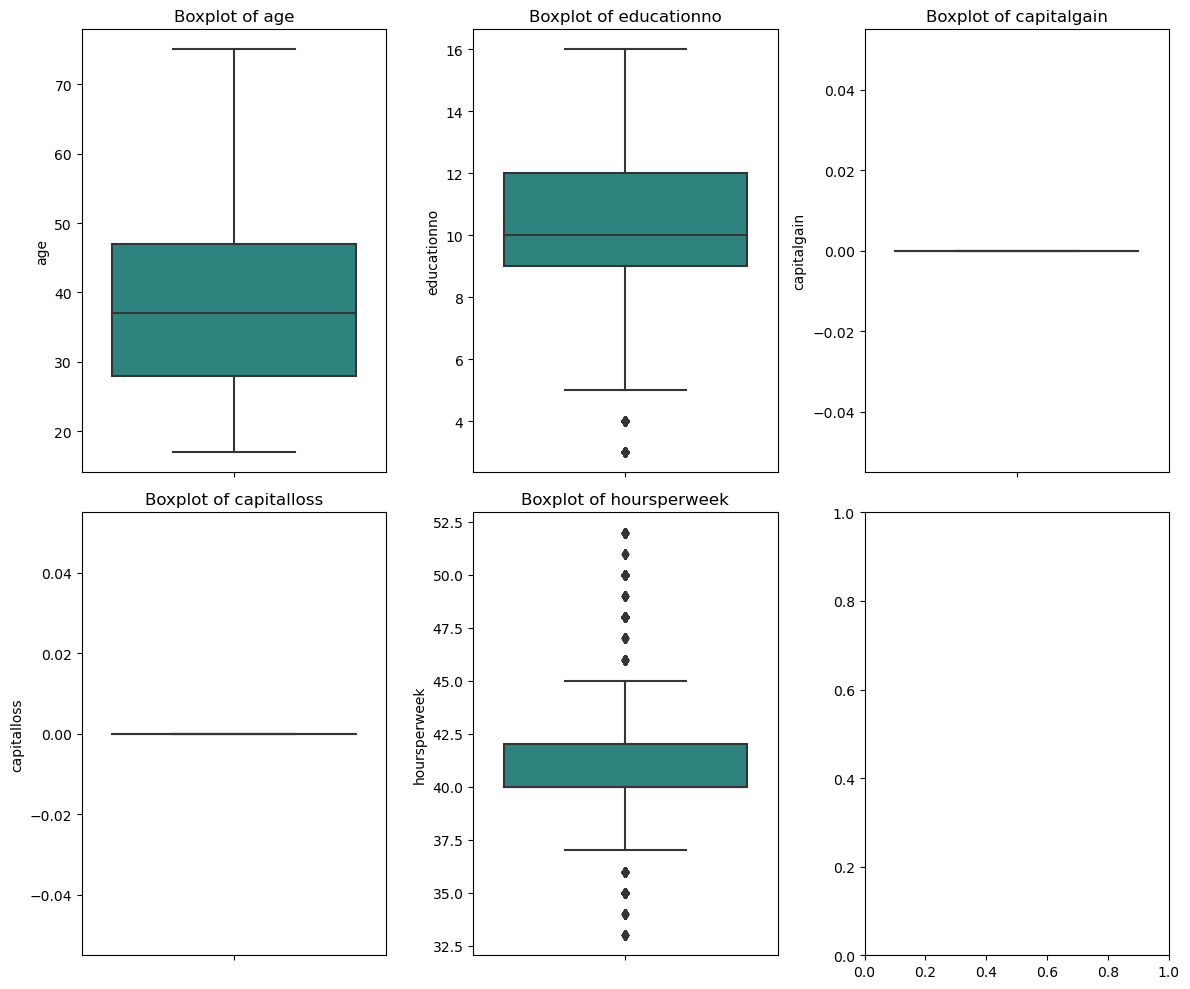

In [13]:
##---OUT-LIERS---
numerical_columns = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
for i, variable in enumerate(numerical_columns):
    sns.boxplot(data=df, y=variable, ax=axes[i // 3, i % 3], palette='viridis')
    axes[i // 3, i % 3].set_title(f'Boxplot of {variable}')
    # Calculate IQR
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[variable] < lower_bound) | (df[variable] > upper_bound)
    df = df[~outliers]
plt.tight_layout()
plt.show()

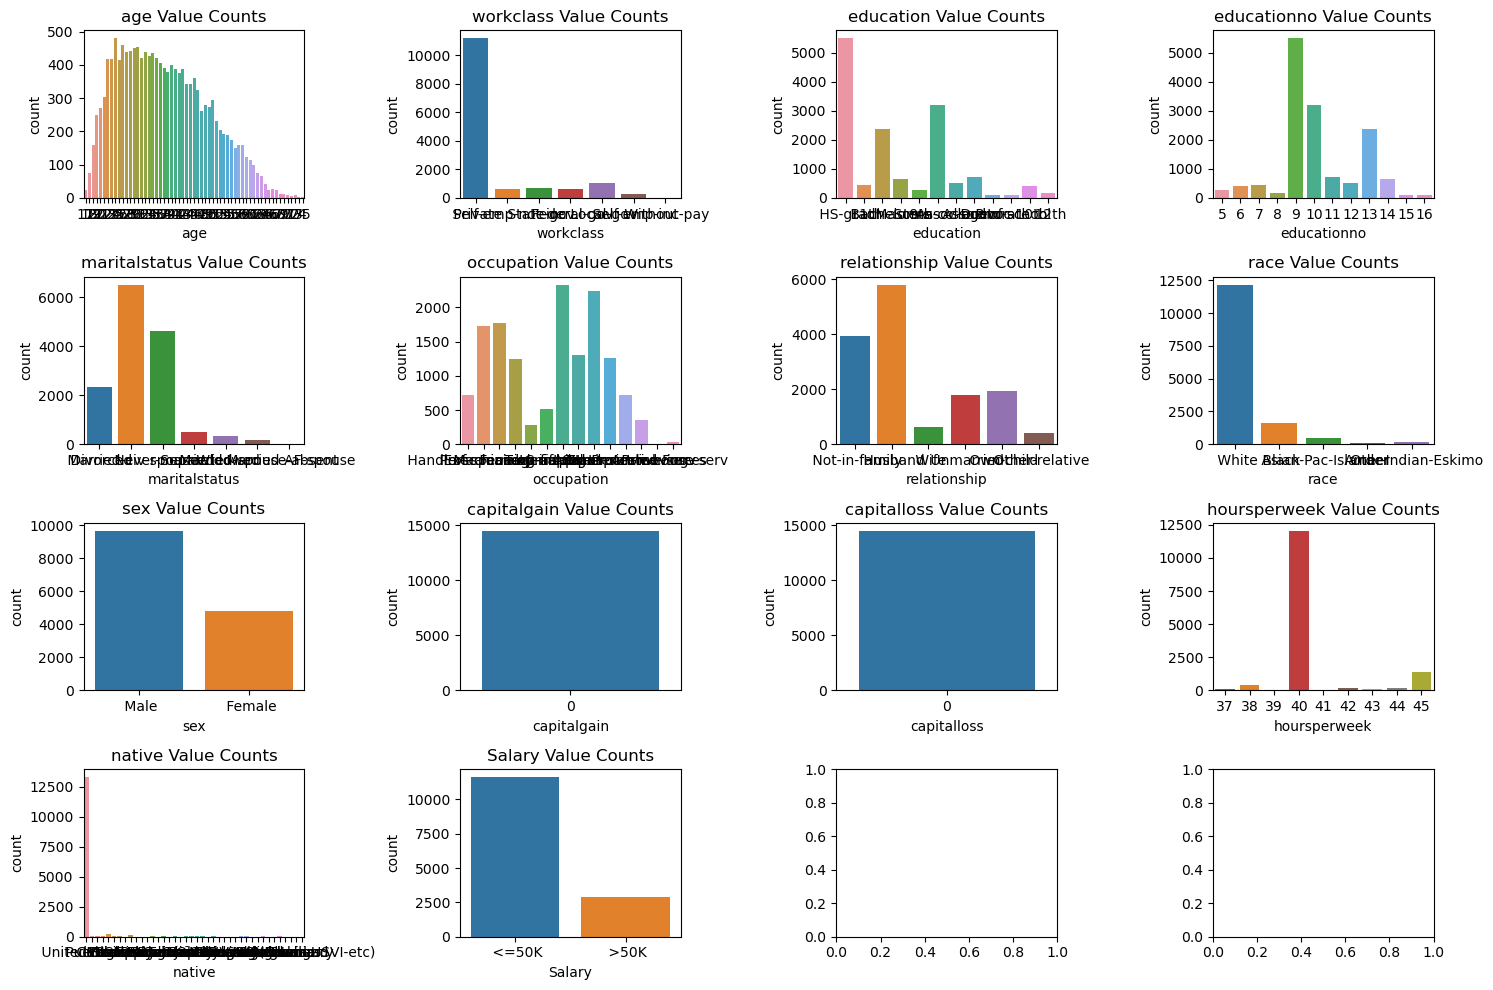

In [14]:
##--Value counts-plot---##
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,10))
axes = axes.flatten()
for i, column in enumerate(hp):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'{column} Value Counts')
plt.tight_layout()
plt.show()

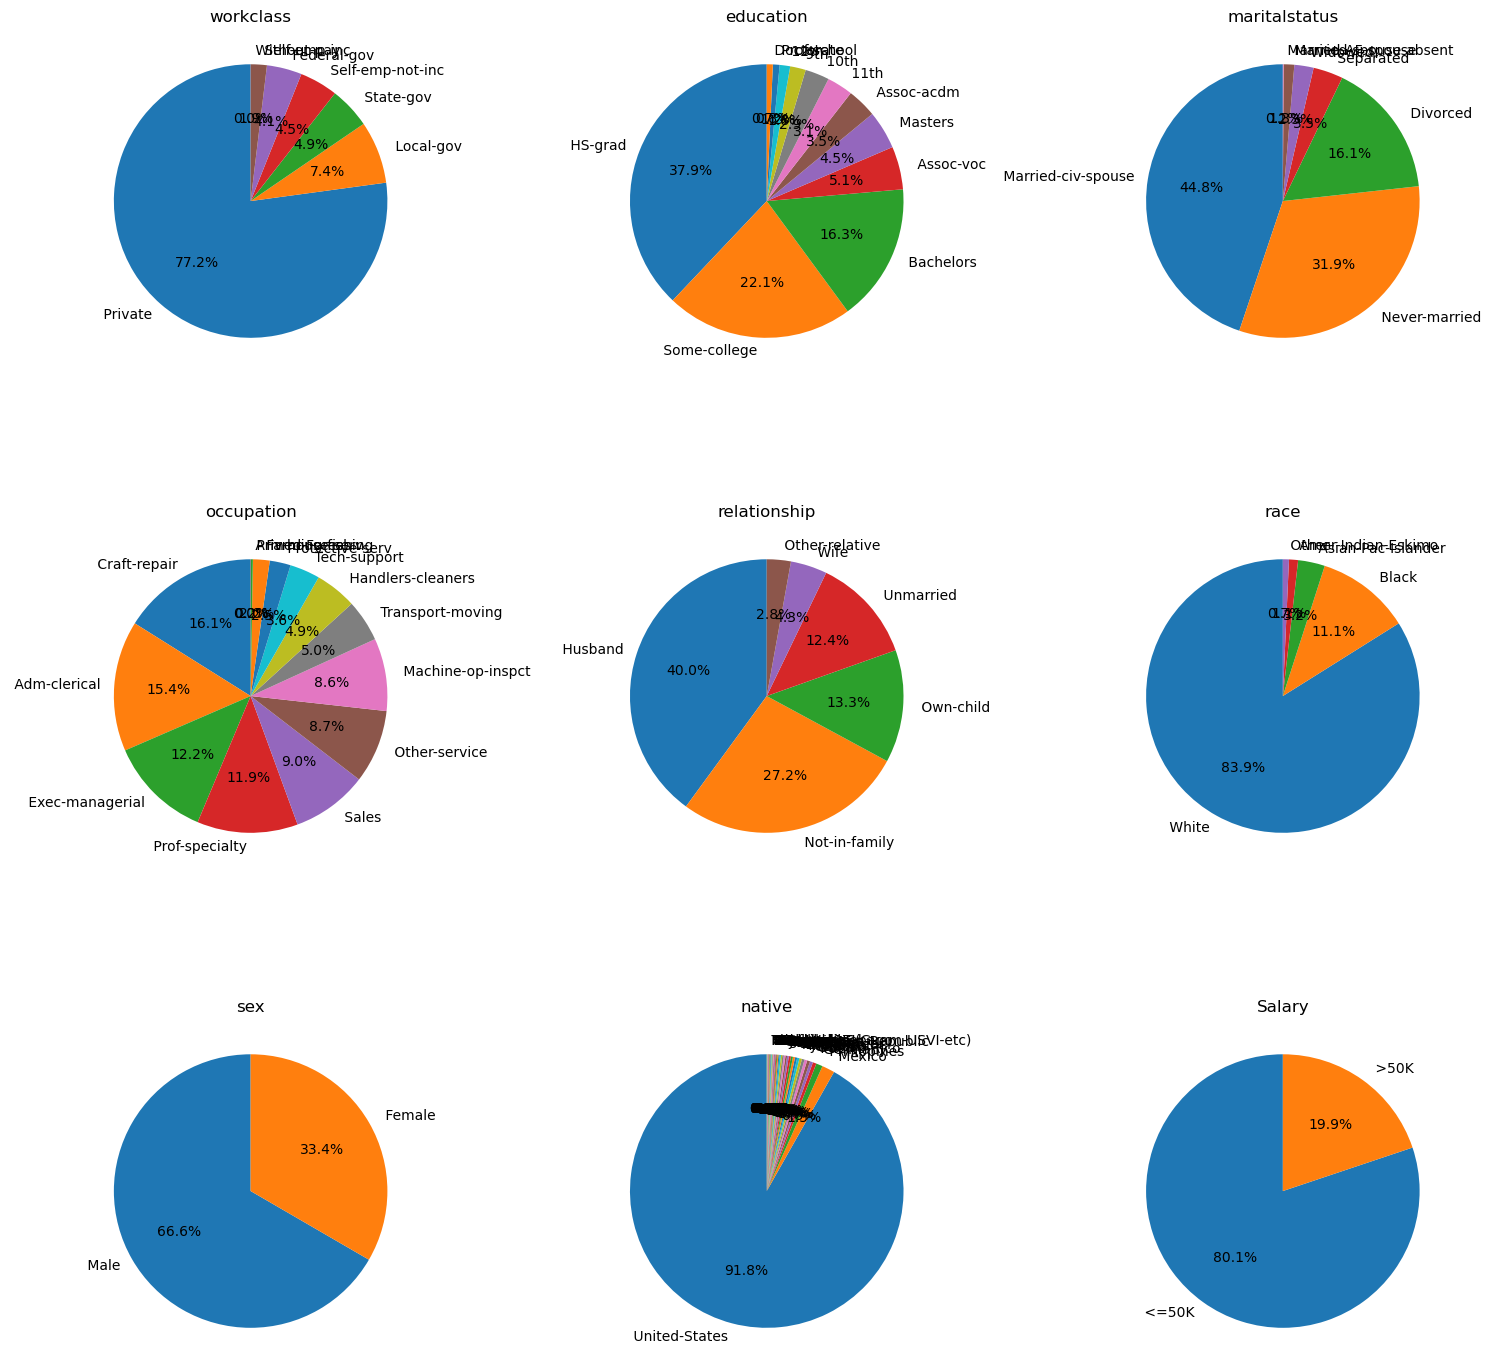

In [15]:
###---PIE-Chart---###
categories = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, category in enumerate(categories):
    category_counts = df[category].value_counts()
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(category)
plt.tight_layout()
plt.show()

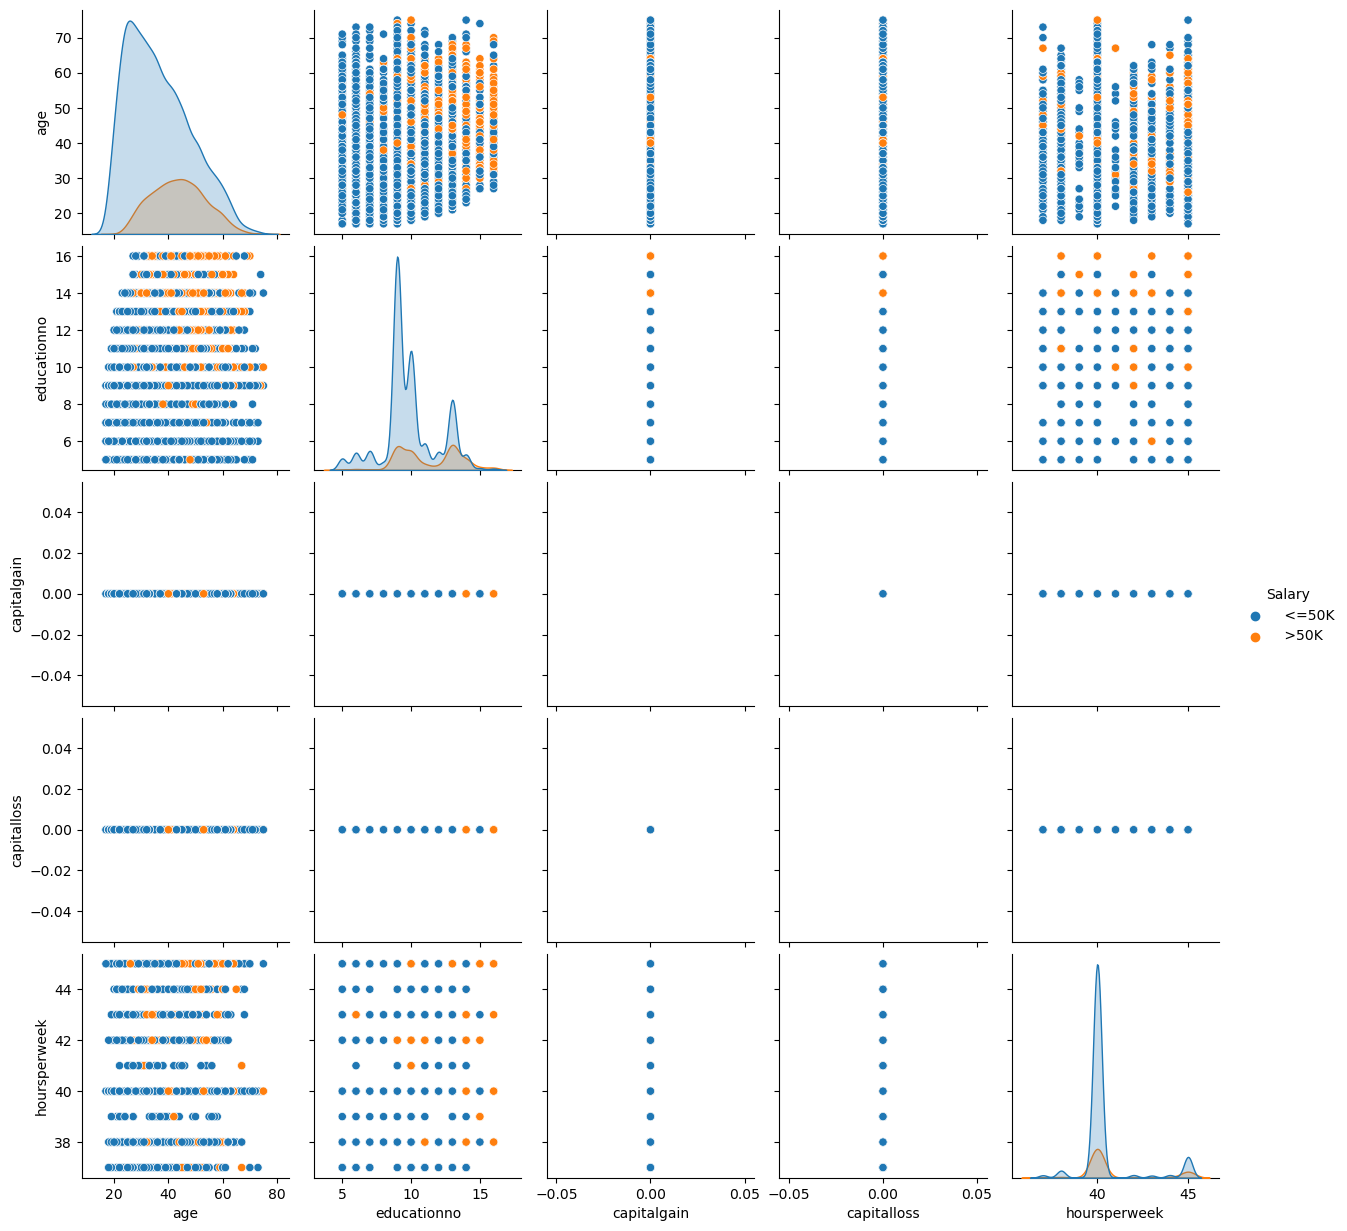

In [16]:
##--Pair plot---##
sns.pairplot(df,hue='Salary')
plt.show()

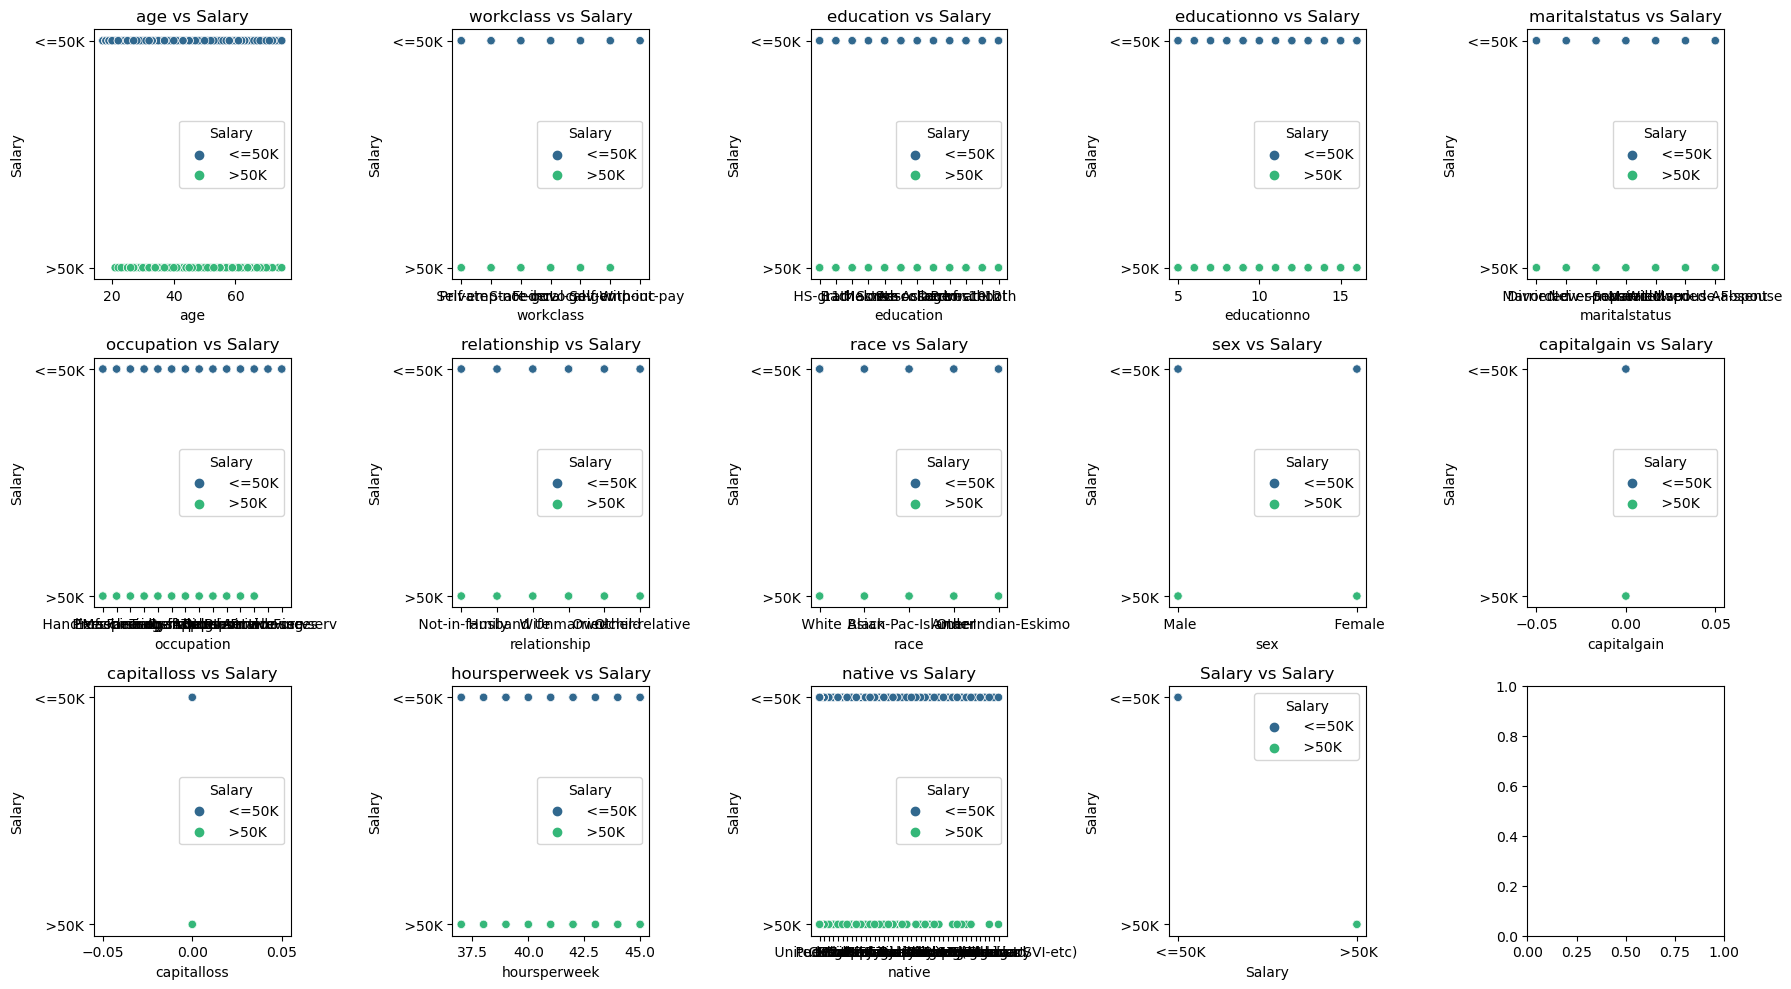

In [17]:
# Scatter plot 
df = pd.DataFrame(df)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 10))
axes = axes.flatten()
colors = sns.color_palette('viridis', n_colors=len(df['Salary'].unique()))
for i, variable in enumerate(hp):
    sns.scatterplot(data=df, x=variable, y='Salary', ax=axes[i], hue='Salary', palette=colors)
    axes[i].set_title(f'{variable} vs Salary')
plt.tight_layout()
plt.show()

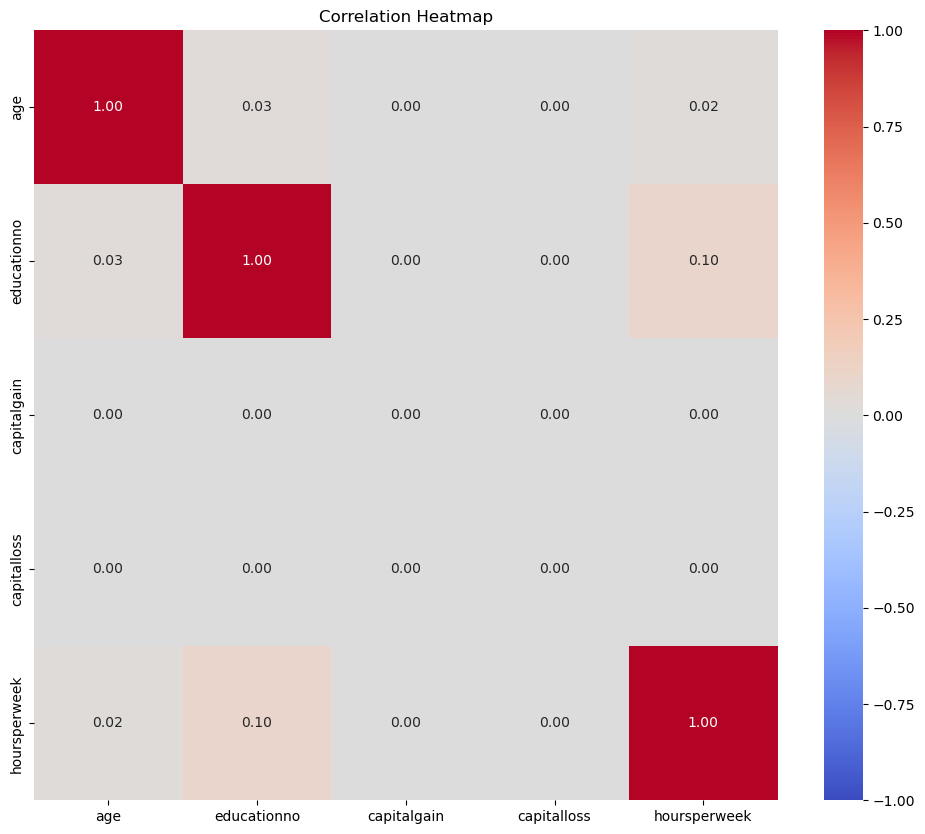

In [18]:
##--Heat-map---##
df_corr = df.corr().fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
## Label Encoding--
Le=LabelEncoder()

In [20]:
### Label Encoding variables
df['Salary'] = Le.fit_transform(df['Salary'])
df['workclass']=Le.fit_transform(df['workclass'])
df['education']=Le.fit_transform(df['education'])
df['maritalstatus']=Le.fit_transform(df['maritalstatus'])
df['occupation']=Le.fit_transform(df['occupation'])
df['relationship']=Le.fit_transform(df['relationship'])
df['race']=Le.fit_transform(df['race'])
df['sex']=Le.fit_transform(df['sex'])
df['native']=Le.fit_transform(df['native'])

In [21]:
####----X-Y-- $####
y=df['Salary']
x=df.iloc[:,0:13]

In [22]:
### Multinomial Naive Bayes--
MNB = MultinomialNB()

In [23]:
training_accuracy_mnb = []
test_accuracy_mnb = []

for i in range(1,1001):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    MNB.fit(X_train,Y_train)
    Y_pred_train = MNB.predict(X_train)
    Y_pred_test  = MNB.predict(X_test)
    training_accuracy_mnb.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy_mnb.append(accuracy_score(Y_test ,Y_pred_test))


In [25]:
print("Average training accuracy:",np.mean(training_accuracy_mnb).round(3))
print("Average test accuracy:",np.mean(test_accuracy_mnb).round(3))

Average training accuracy: 0.761
Average test accuracy: 0.76


In [26]:
### Guassian Naive Bayes----
Gnb=GaussianNB()

In [27]:
training_accuracy_gnb = []
test_accuracy_gnb = []
for i in range(1, 1001):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    Gnb = GaussianNB()
    Gnb.fit(X_train, Y_train)  # Fit the model
    Y_pred_train = Gnb.predict(X_train)
    Y_pred_test = Gnb.predict(X_test)
    training_accuracy_gnb.append(accuracy_score(Y_train, Y_pred_train))
    test_accuracy_gnb.append(accuracy_score(Y_test, Y_pred_test))

In [28]:
print("Average training accuracy:", np.mean(training_accuracy_gnb).round(3))
print("Average test accuracy:", np.mean(test_accuracy_gnb).round(3))

Average training accuracy: 0.799
Average test accuracy: 0.799


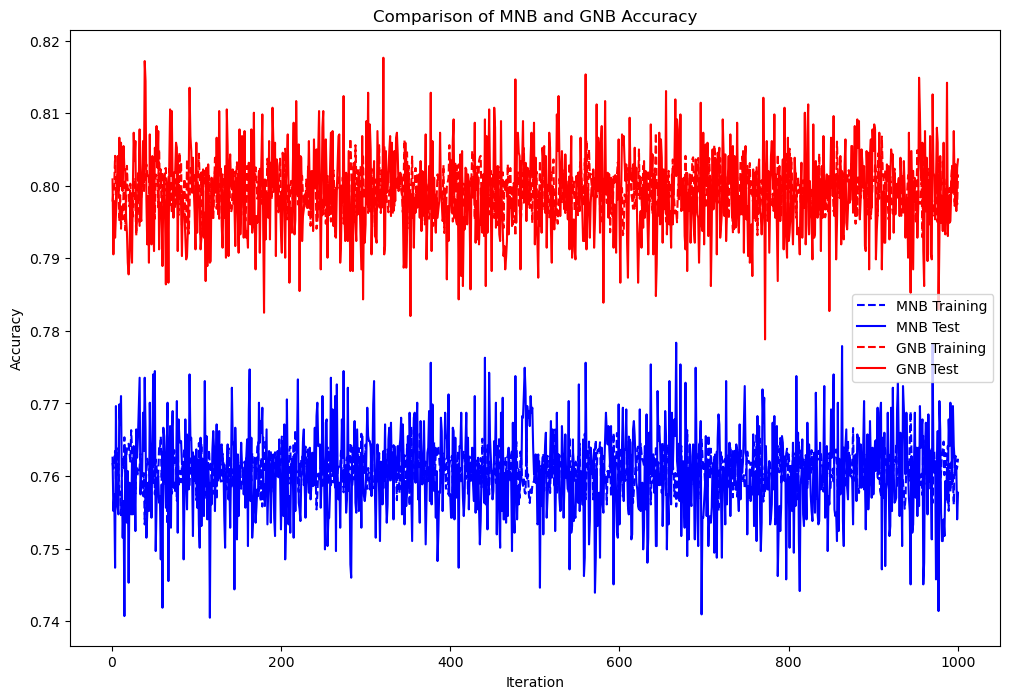

In [29]:
### -- Comparison of MNB and GNB Accuracy
plt.figure(figsize=(12, 8))
# Multinomial Naive Bayes
plt.plot(np.arange(1, 1001), training_accuracy_mnb, label='MNB Training', color='blue', linestyle='--')
plt.plot(np.arange(1, 1001), test_accuracy_mnb, label='MNB Test', color='blue')
# Gaussian Naive Bayes
plt.plot(np.arange(1, 1001), training_accuracy_gnb, label='GNB Training', color='red', linestyle='--')
plt.plot(np.arange(1, 1001), test_accuracy_gnb, label='GNB Test', color='red')

plt.title('Comparison of MNB and GNB Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()